In [1]:
import pandas as pd 

d = pd.read_csv('mom1_data_combined_adj_close.csv', index_col=0)

In [2]:
d.head()

1979-05   1979-06   1979-07   1979-08  1979-09   1979-10   1979-11  \
Firm Name                                                                       
10001          NaN       NaN       NaN       NaN      NaN       NaN       NaN   
10002          NaN       NaN       NaN       NaN      NaN       NaN       NaN   
10006          NaN  0.072243  0.007092  0.077465 -0.03268 -0.135135  0.070312   
10010          NaN       NaN       NaN       NaN      NaN       NaN       NaN   
10011          NaN       NaN       NaN       NaN      NaN       NaN       NaN   

           1979-12   1980-01   1980-02  ...  2021-11  2021-12  2022-01  \
Firm Name                               ...                              
10001          NaN       NaN       NaN  ...      NaN      NaN      NaN   
10002          NaN       NaN       NaN  ...      NaN      NaN      NaN   
10006          0.0  0.211679 -0.072289  ...      NaN      NaN      NaN   
10010          NaN       NaN       NaN  ...      NaN      NaN      NaN   
10011          NaN       NaN       NaN  ...      NaN      NaN      NaN   

           2022-02  2022-03  2022-04  2022-05  2022-06  2022-07  2022-08  
Firm Name                                                                 
10001          NaN      NaN      NaN      NaN      NaN      NaN      NaN  
10002          NaN      NaN      NaN      NaN      NaN      NaN      NaN  
10006          NaN      NaN      NaN      NaN      NaN      NaN      NaN  
10010          NaN      NaN      NaN      NaN      NaN      NaN      NaN  
10011          NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[5 rows x 520 columns]

In [28]:
dd = d['1990-01'].dropna()
dd

Firm Name
10057   -0.057471
10137   -0.041791
10145   -0.025090
10154   -0.071429
10161   -0.027174
           ...   
91871    0.169231
92100   -0.134752
92655   -0.237113
92874   -0.234043
92989    0.090909
Name: 1990-01, Length: 1953, dtype: float64

In [23]:
c = pd.read_csv('1990-01.csv', index_col=0)
c.index.name = d.index.name
c.sort_index(inplace=True)

In [24]:
c

clusters      mom1
Firm Name                    
10057             3 -0.057471
10137             9 -0.041791
10145             3 -0.025090
10154             1 -0.071429
10161             7 -0.027174
...             ...       ...
91871             5  0.169231
92100             5 -0.134752
92655             5 -0.237113
92874             1 -0.234043
92989             1  0.090909

[1953 rows x 2 columns]

In [29]:
dd * c['mom1']

Firm Name
10057    0.003303
10137    0.001746
10145    0.000629
10154    0.005102
10161    0.000738
           ...   
91871    0.028639
92100    0.018158
92655    0.056223
92874    0.054776
92989    0.008264
Length: 1953, dtype: float64

In [35]:
import yfinance as yf
import pandas as pd

# Download S&P 500 data
sp500 = yf.download('^GSPC', start='1990-12-01', end='2022-08-31', interval='1mo')

# Drop any NaN values that may result from the interval change
sp500.dropna(inplace=True)

# Calculate monthly returns
sp500['Monthly Returns'] = sp500['Close'].pct_change()

# Calculate monthly volatility
sp500_daily = yf.download('^GSPC', start='1990-12-01', end='2022-08-31', interval='1d')
sp500_daily['Daily Returns'] = sp500_daily['Close'].pct_change()
sp500_daily['Monthly Volatility'] = sp500_daily['Daily Returns'].rolling(window=21).std() * (252 ** 0.5)

# Create a dataframe with monthly returns and volatility
monthly_data = pd.DataFrame({'Monthly Returns': sp500['Monthly Returns'], 'Monthly Volatility': sp500_daily['Monthly Volatility']})

monthly_data.head()



[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


Monthly Returns  Monthly Volatility
Date                                           
1991-02-01         0.067281            0.183589
1991-03-01         0.022203            0.168602
1991-04-01         0.000320            0.136425
1991-05-01         0.038605            0.144152
1991-07-01         0.044859            0.136002
...                     ...                 ...
2022-03-01         0.035773            0.231102
2022-04-01        -0.087957            0.226058
2022-06-01        -0.083920            0.313090
2022-07-01         0.091116            0.298076
2022-08-01        -0.042440            0.189296

[245 rows x 2 columns]

In [55]:
import yfinance as yf
import pandas as pd

# Download S&P 500 data for monthly and daily intervals
sp500_monthly = yf.download('^GSPC', start='1990-12-01', end='2022-08-31', interval='1mo')
sp500_daily = yf.download('^GSPC', start='1990-12-01', end='2022-08-31', interval='1d')

# Clean the data by dropping NaN values
sp500_monthly.dropna(inplace=True)
sp500_daily.dropna(inplace=True)

# Calculate monthly returns
sp500_monthly['Monthly Returns'] = sp500_monthly['Close'].pct_change()

# Calculate daily returns
sp500_daily['Daily Returns'] = sp500_daily['Close'].pct_change()

# Group by Year and Month, and calculate standard deviation of daily returns
sp500_daily['Year'] = sp500_daily.index.year
sp500_daily['Month'] = sp500_daily.index.month
monthly_volatility = sp500_daily.groupby(['Year', 'Month'])['Daily Returns'].std() * (12 ** 0.5)

# Convert the MultiIndex to a single datetime index
monthly_volatility.index = pd.to_datetime(monthly_volatility.index.map(lambda x: f"{x[0]}-{x[1]:02}"))
monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')

# Merge the monthly returns and monthly volatility data
monthly_data = pd.DataFrame({'Monthly Returns': sp500_monthly['Monthly Returns']})
monthly_data.index = monthly_data.index.strftime('%Y-%m')
monthly_data = monthly_data.join(monthly_volatility.rename('Monthly Volatility'))

monthly_data.dropna(inplace=True)
monthly_data


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Monthly Returns  Monthly Volatility
Date                                        
1991-01         0.041518            0.042172
1991-02         0.067281            0.038296
1991-03         0.022203            0.029194
1991-04         0.000320            0.034413
1991-05         0.038605            0.029456
...                  ...                 ...
2022-04        -0.087957            0.053461
2022-05         0.000053            0.068232
2022-06        -0.083920            0.064190
2022-07         0.091116            0.042005
2022-08        -0.042440            0.043000

[380 rows x 2 columns]

In [49]:
# index Date to Month
monthly_data.index = pd.to_datetime(monthly_data.index.map(lambda x: f"{x.year}-{x.month}"))

In [58]:
monthly_data.loc['1991-01']

Monthly Returns       0.041518
Monthly Volatility    0.042172
Name: 1991-01, dtype: float64

In [47]:
(1+monthly_data['Monthly Returns'].dropna()).cumprod().plot()

<Axes: xlabel='Date'>

In [1]:
import pandas as pd
import numpy as np
import os
import sys
from scipy.stats.mstats import winsorize

frame = pd.read_csv('mom1_data_combined_adj_close.csv', index_col=0)
column_filter = [col for col in frame.columns if col >= '1990-01']
frame = frame[column_filter]

# frame
print(frame['1990-01'].max())

# 1. NaN 값을 0으로 채우기
df_filled_zeros = frame.fillna(0)

# 2. Winsorizing 진행
df_winsorized_filled_zeros = df_filled_zeros.apply(lambda x: pd.Series(winsorize(x, limits=[0.015, 0.015]), index=x.index))

# 3. 원래 NaN이었던 곳을 다시 NaN으로 만들기
df_winsorized_final = df_winsorized_filled_zeros.where(frame.notna())

# 최종 winsorized 데이터의 '1990-01' 열에서의 최대값 확인
final_max_value = df_winsorized_final['1990-01'].max()
print(final_max_value)

1.6666666666666663
0.064516129032258


In [ ]:
final_max_value

In [29]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm.auto import tqdm
import copy

def investment_strategy(return_data_frame, threshold):
    cluster_dir = '../res/predictions/10_characteristics_us_batch_64_bins_32_hidden_128'
    cluster_results = glob(cluster_dir + '/*')
    cluster_results.sort()

    all_months = return_data_frame.columns

    cumulative_return = 0
    cumulative_returns_list = []
    log_returns_list = []

    for idx, current_month in enumerate(tqdm(all_months)):
        # 원본 데이터 복사
        copy_dataframe = copy.deepcopy(return_data_frame)

        assert str(cluster_results[idx].split('/')[-1].split('.')[0]) == str(current_month), '월이 일치하지 않음'

        # 다음 달 
        next_month = all_months[idx+1] if idx+1 < len(all_months) else None
        if next_month is None:
            continue
        
        cluster_data = pd.read_csv(cluster_results[idx], index_col=0)
        cluster_data.sort_values(by='mom1', ascending=False, inplace=True)
        cluster_data['position'] = 0

        # 스프레드 계산
        for _, group in cluster_data.groupby('clusters'):
            returns_asc = group.sort_values(by='mom1', ascending=True)['mom1']
            returns_desc = group.sort_values(by='mom1', ascending=False)['mom1']
            spread_vec = returns_desc.values - returns_asc.values

            group['spread'] = spread_vec
            spread_std = group['spread'].std()

            # 표준편차 기반 투자 결정
            in_portfolio = group['spread'].abs() > spread_std * threshold
            cluster_data.loc[group.index, 'position'] = in_portfolio * (-group['spread'] / group['spread'].abs())

        # Long 포지션 수익률 반영
        long_positions = cluster_data[cluster_data['position'] == 1]
        copy_dataframe.loc[long_positions.index, next_month] *= 1

        # Short 포지션 수익률 반영 (음수로 만들어 숏매매 수익률 반영)
        short_positions = cluster_data[cluster_data['position'] == -1]
        copy_dataframe.loc[short_positions.index, next_month] *= -1

        # 보유하지 않은 자산은 수익률 0
        no_position = cluster_data[cluster_data['position'] == 0]
        copy_dataframe.loc[no_position.index, next_month] = 0

        # 다음 달의 평균 수익률 계산
        average_return_next_month = copy_dataframe[next_month].dropna().mean()

        # 저장
        log_return = np.log(1 + average_return_next_month)
        log_returns_list.append(log_return)
        cumulative_return = np.exp(np.log(1 + cumulative_return) + log_return) - 1
        cumulative_returns_list.append(cumulative_return)

    print("포트폴리오 수익률: ", cumulative_return)    
    return cumulative_return, cumulative_returns_list, log_returns_list


cumulative_return, cumulative_returns_list, log_returns_list = investment_strategy(df_winsorized_final, threshold=0)

  0%|          | 0/392 [00:00<?, ?it/s]

포트폴리오 수익률:  2.6385965879818407


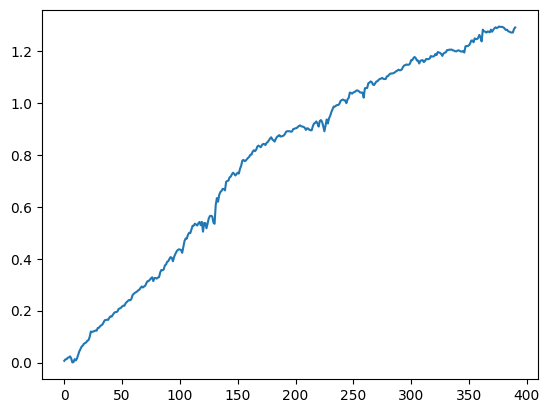

In [30]:
import matplotlib.pyplot as plt
plt.plot(np.log(np.array(cumulative_returns_list)+1))

In [27]:
cumulative_return, cumulative_returns_list, log_returns_list = investment_strategy(df_winsorized_final, threshold=2)

  0%|          | 0/392 [00:00<?, ?it/s]

포트폴리오 수익률:  0.23826870956179058


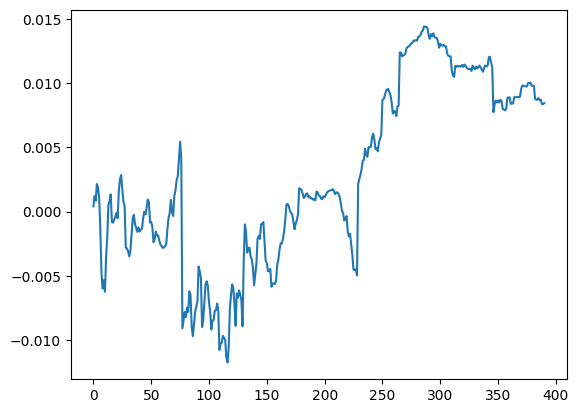

In [20]:
import matplotlib.pyplot as plt
plt.plot(np.log(np.array(cumulative_returns_list)+1))